In [125]:
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import numpy as np
from scipy.spatial.distance import pdist,cdist, squareform
from functions import *
from sklearn.metrics import silhouette_score, adjusted_rand_score
import random

random.seed(5)

# Load a standard dataset (PBMC3k)
adata = sc.datasets.pbmc3k_processed()
X = adata.obsm["X_pca"]
print(X.shape)

(2638, 50)


In [126]:
tsne = TSNE(n_components=2,perplexity=50.0, early_exaggeration=25.0)
X_tsne = tsne.fit_transform(squareform(pdist(X)))

db = DBSCAN(eps=5, min_samples=5).fit(X_tsne)
labels = db.labels_  # cluster labels, -1 means noise
order = np.argsort(labels)
X_reordered = X[order]

# Reorder dataset and labels
X_reordered_tsne = X_tsne[order]
labels_reordered = labels[order]



In [127]:
X_transformed, blownup_distance_matrix = impostor(X, 1.0/10000)
X_transformed_tsne = TSNE(n_components=2,perplexity=70.0).fit_transform(blownup_distance_matrix)

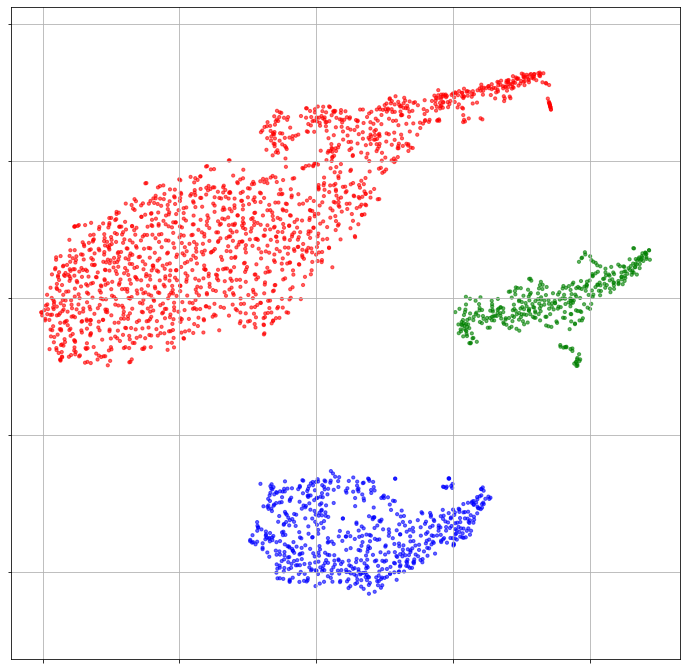

In [128]:
import matplotlib.colors as mcolors

cmap = mcolors.ListedColormap(["red", "green", "blue"])

fig, ax = plt.subplots(figsize=(12,12))
ax.grid('on')
ax.axis('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, alpha=0.6, c=labels, cmap=cmap)

plt.savefig('visuals/single_cell/original_in_color.png')

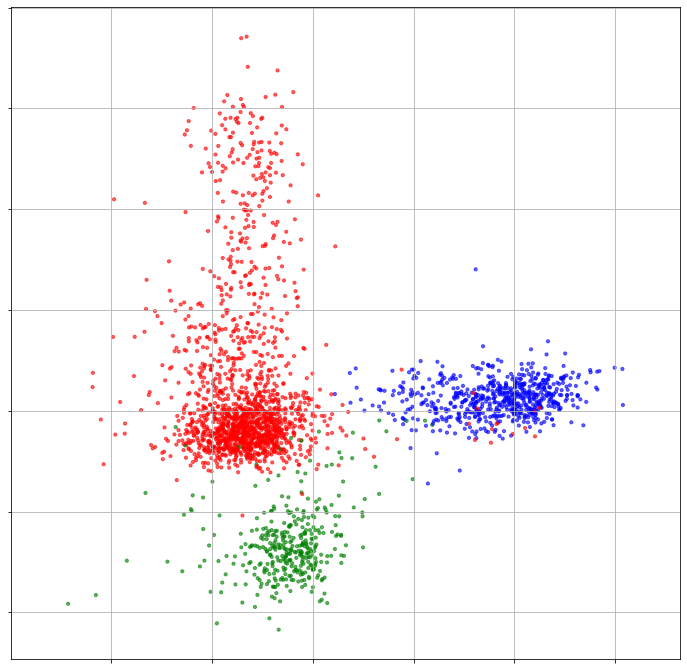

In [129]:
X_pca = PCA(n_components=2).fit_transform(X)
fig, ax = plt.subplots(figsize=(12,12))
ax.grid('on')
ax.axis('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.6,  c=labels, cmap=cmap)
plt.savefig('visuals/single_cell/pca_in_color.png')

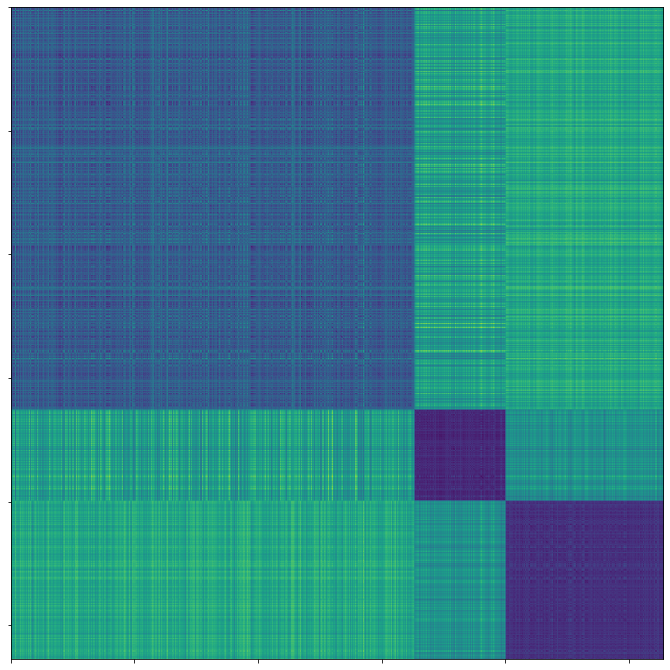

In [130]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.imshow(squareform(pdist(X_reordered_tsne)))
plt.savefig('visuals/single_cell/OG_tsne_idm.png')

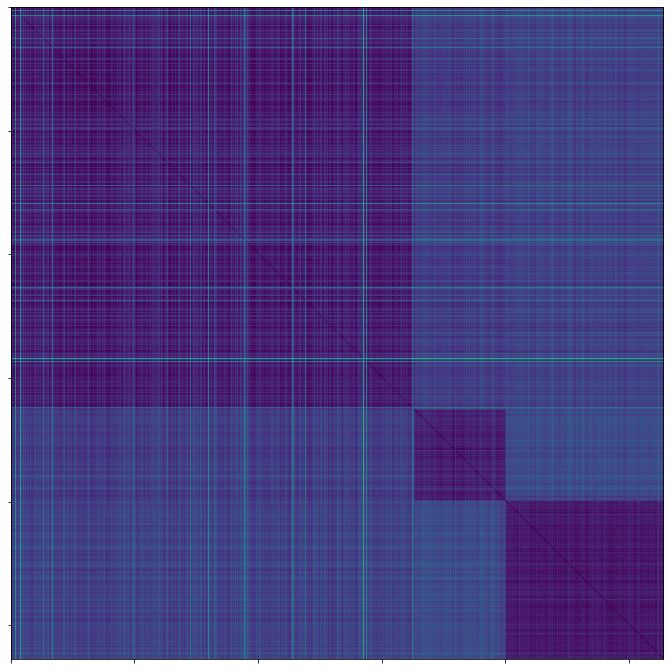

In [131]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.imshow(squareform(pdist(X_reordered)), vmin=13,vmax=50)
plt.savefig('visuals/single_cell/OG_og_idm.png')

In [132]:
print('Silhouette of DBSCAN on original \t', silhouette_score(X, labels))
#print('Silhouette of DBSCAN on transformed \t', silhouette_score(X_transformed, labels))

print('Silhouette of DBSCAN on t-sne \t\t', silhouette_score(X_tsne, labels))
print('Silhouette of DBSCAN on t-sne of trx \t\t', silhouette_score(X_transformed_tsne, labels))

print('Silhouette of DBSCAN on pca \t\t', silhouette_score(X_pca, labels))
print('Silhouette of DBSCAN on pca of trx \t\t', silhouette_score(X_pca_trx, labels))

Silhouette of DBSCAN on original 	 0.17945886
Silhouette of DBSCAN on t-sne 		 0.51431316
Silhouette of DBSCAN on t-sne of trx 		 0.5458712
Silhouette of DBSCAN on pca 		 0.50245845
Silhouette of DBSCAN on pca of trx 		 -0.05369940433350124


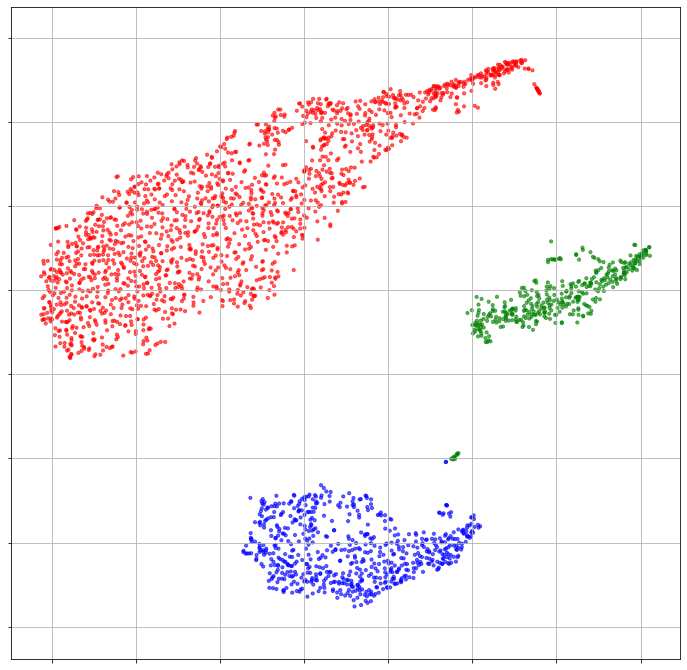

In [133]:
fig, ax = plt.subplots(figsize=(12,12))
ax.grid('on')
ax.axis('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])


plt.scatter(X_transformed_tsne[:, 0], X_transformed_tsne[:, 1], s=10, alpha=0.6, c=labels, cmap=cmap)
plt.savefig('visuals/single_cell/TRX_tsne_color.png')

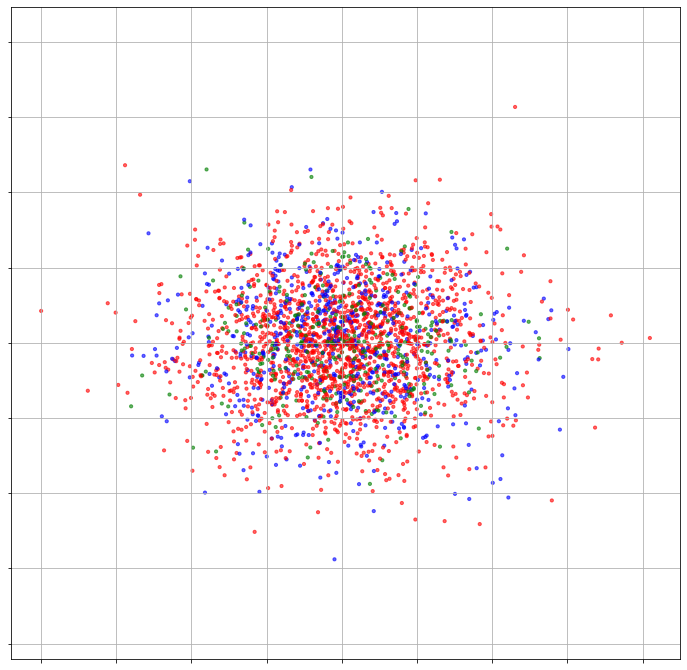

In [134]:
X_pca_trx = PCA(n_components=2).fit_transform(X_transformed)
fig, ax = plt.subplots(figsize=(12,12))
ax.grid('on')
ax.axis('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.scatter(X_pca_trx[:, 0], X_pca_trx[:, 1], s=10, alpha=0.6, c=labels, cmap=cmap)
plt.savefig('visuals/single_cell/TRX_pca_color.png')

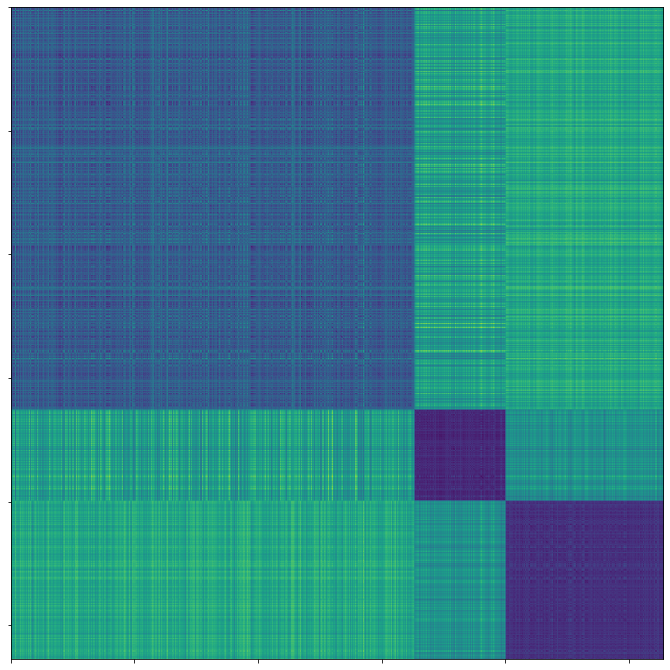

In [135]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.imshow(squareform(pdist(X_reordered_tsne)))
plt.savefig('visuals/single_cell/TRX_tsne_idm.png')

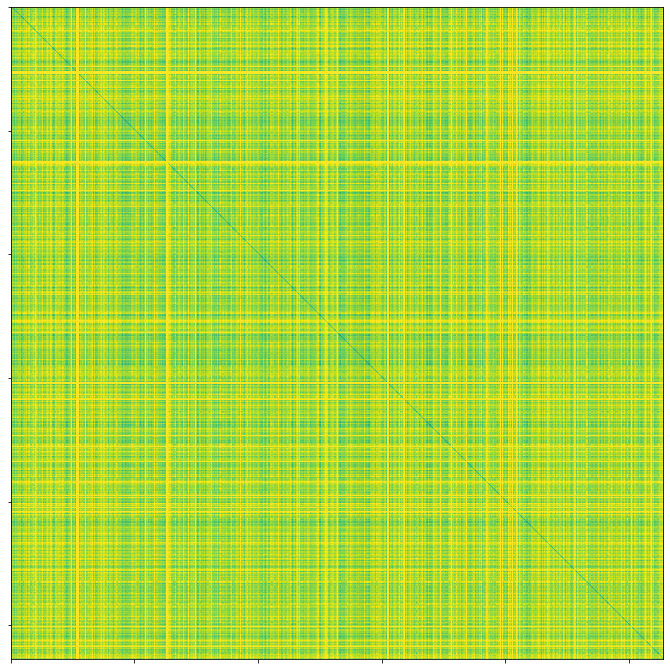

In [136]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xticklabels([])
ax.set_yticklabels([])
vmin=np.min( blownup_distance_matrix.flatten() )
vmax=np.percentile( blownup_distance_matrix.flatten() , 75)
plt.imshow(blownup_distance_matrix, vmin=vmin, vmax=vmax)
plt.savefig('visuals/single_cell/TRX_og_idm.png')

In [137]:
orig_ss = silhouette_score(X, labels)
blownup_ss = silhouette_score(X_transformed, labels)

tsne_ss = silhouette_score(X_tsne, labels)
tsne_blownup_ss = silhouette_score(X_transformed_tsne, labels)

pca_ss = silhouette_score(X_pca, labels)
pca_blownup_ss = silhouette_score(X_pca_trx, labels)

print('Silhouette of DBSCAN on original \t\t\t', orig_ss)
print('Silhouette of DBSCAN on transformed \t\t\t',blownup_ss)
print()
print('Silhouette of DBSCAN on t-sne \t\t\t\t', tsne_ss)
print('Silhouette of DBSCAN on t-sne of trx \t\t\t', tsne_blownup_ss)
print()
print('Silhouette of DBSCAN on pca \t\t\t\t', pca_ss)
print('Silhouette of DBSCAN on pca of trx \t\t\t', pca_blownup_ss)

Silhouette of DBSCAN on original 			 0.17945886
Silhouette of DBSCAN on transformed 			 0.013998680229952164

Silhouette of DBSCAN on t-sne 				 0.51431316
Silhouette of DBSCAN on t-sne of trx 			 0.5458712

Silhouette of DBSCAN on pca 				 0.50245845
Silhouette of DBSCAN on pca of trx 			 -0.05369915718313461


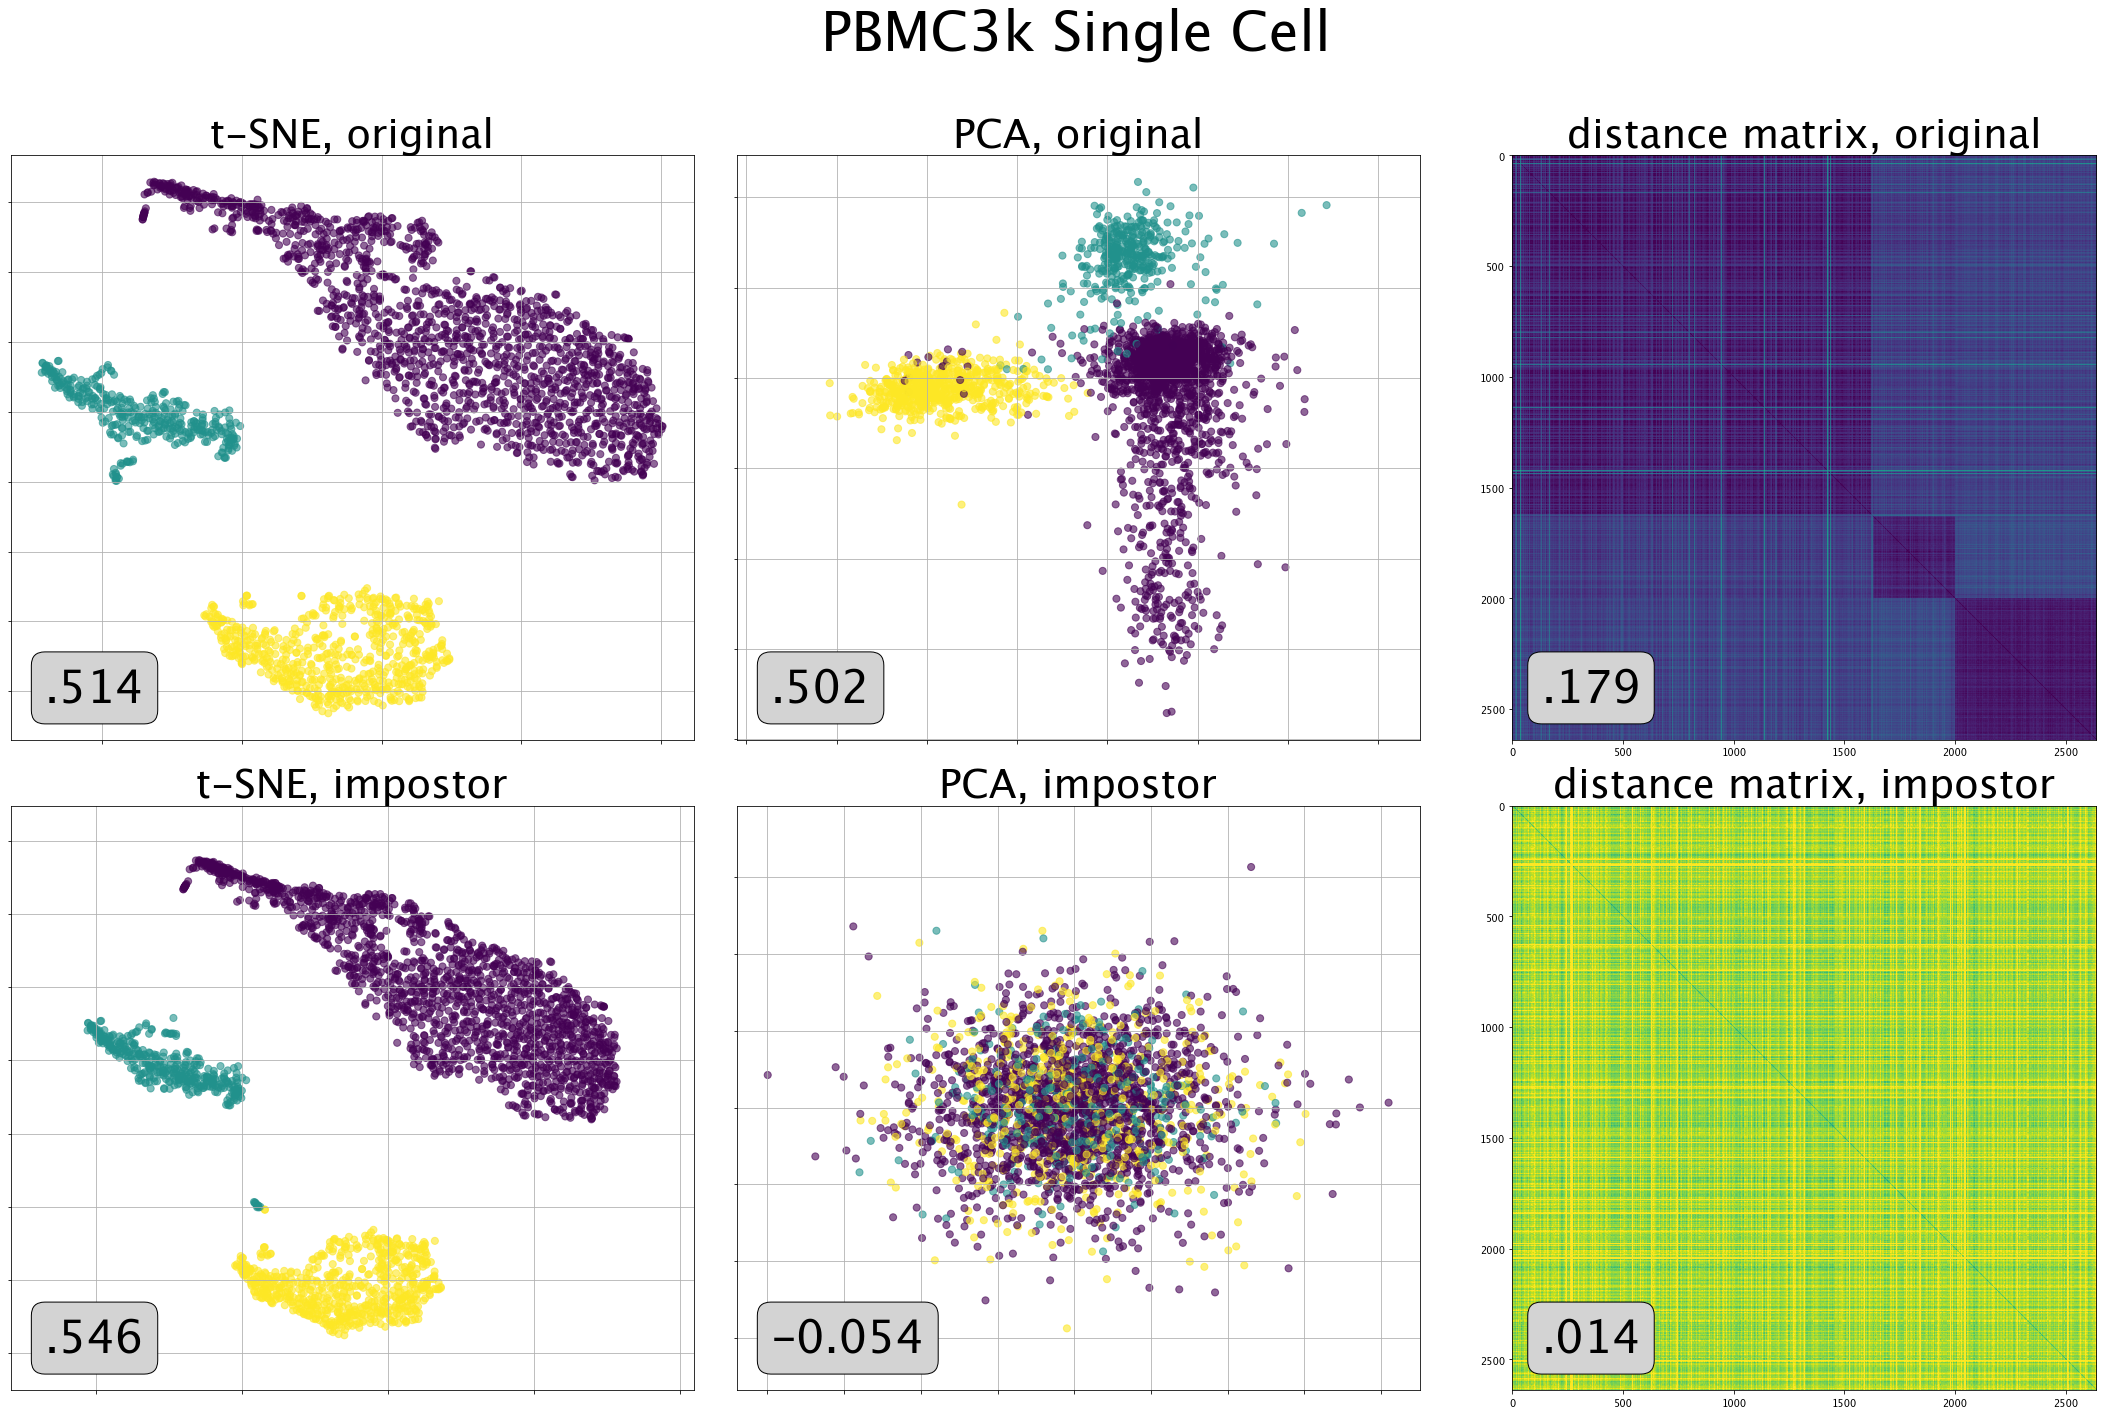

In [138]:
fig, axs = plt.subplots(2,3, figsize=(30,20))

#cmap = mcolors.ListedColormap(["purple", "green", "blue"])

for i in range(2):
    for j in range(2):
        axs[i,j].grid('on')
        axs[i,j].axis('equal')
        axs[i,j].set_xticklabels([])
        axs[i,j].set_yticklabels([])

axs[0,0].text(0.05, 0.05, f"{tsne_ss:.3f}".lstrip("0"),transform=axs[0,0].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=45, ha="left", va="bottom")
axs[0,0].set_title('t-SNE, original', fontsize=40)
axs[0,0].scatter(-X_tsne[:, 0], X_tsne[:, 1], s=50, alpha=0.6,  c=labels)#, cmap=cmap)

axs[0,2].text(0.05, 0.05, f"{orig_ss:.3f}".lstrip("0"), transform=axs[0,2].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=45, ha="left", va="bottom")
axs[0,2].set_title('distance matrix, original', fontsize=40)
axs[0,2].imshow(squareform(pdist(X_reordered)), vmin=13,vmax=50)

axs[0,1].text(0.05, 0.05, f"{pca_ss:.3f}".lstrip("0"),transform=axs[0,1].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=45, ha="left", va="bottom")
axs[0,1].set_title('PCA, original', fontsize=40)
axs[0,1].scatter(-X_pca[:, 0], -X_pca[:, 1], s=50, alpha=0.6,  c=labels)#, cmap=cmap)



axs[1,0].text(0.05, 0.05, f"{tsne_blownup_ss:.3f}".lstrip("0"), transform=axs[1,0].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=45, ha="left", va="bottom")
axs[1,0].set_title('t-SNE, impostor', fontsize=40)
axs[1,0].scatter(-X_transformed_tsne[:, 0], X_transformed_tsne[:, 1], s=50, alpha=0.6,  c=labels)#, cmap=cmap)

axs[1,2].text(0.05, 0.05, f"{blownup_ss:.3f}".lstrip("0"),transform=axs[1,2].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=45, ha="left", va="bottom")
axs[1,2].set_title('distance matrix, impostor', fontsize=40)
axs[1,2].imshow(blownup_distance_matrix, vmin=vmin, vmax=vmax)

axs[1,1].text(0.05, 0.05, f"{pca_blownup_ss:.3f}".lstrip("0"), transform=axs[1,1].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=45, ha="left", va="bottom")
axs[1,1].set_title('PCA, impostor', fontsize=40)
axs[1,1].scatter(X_pca_trx[:, 0], X_pca_trx[:, 1], s=50, alpha=0.6,  c=labels)#, cmap=cmap)

fig.suptitle('PBMC3k Single Cell\n', fontsize=55)

plt.tight_layout()
plt.savefig('visuals/single_cell/MAIN-single-cell.png', bbox_inches='tight')